In [24]:
import cv2
import glob
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt


In [25]:
os.chdir('D:/Train_resized')

In [26]:
image_array = [] 
files = glob.glob ("*.jpg")
for myFile in files:
    image = cv2.imread (myFile)
    image_array.append (image) 
# // this will print the channel number, size, and number of images in the file

train_x = np.array(image_array)



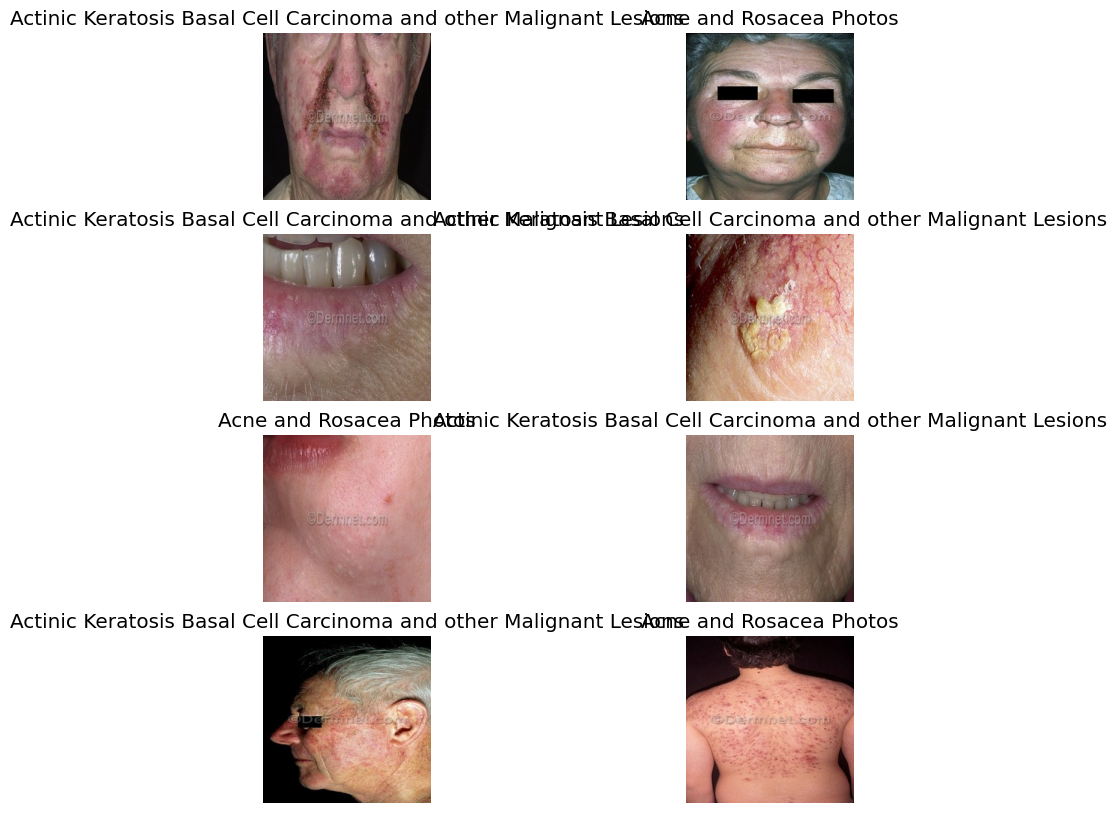

In [27]:
import random
fig = plt.figure(figsize=(10, 10))
for i,rand in enumerate(random.sample(range(1,1000),8)):
    fig.add_subplot(4, 2, i+1)  
    plt.imshow(cv2.cvtColor(cv2.imread (files[rand], cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(files[rand].split("$")[0])

In [28]:
print(train_x) 

[[[[154 155 205]
   [151 152 202]
   [162 163 213]
   ...
   [128 119 170]
   [125 119 168]
   [143 137 186]]

  [[142 143 193]
   [145 146 196]
   [141 142 192]
   ...
   [109 100 151]
   [117 110 161]
   [132 126 175]]

  [[150 151 201]
   [146 147 197]
   [153 152 202]
   ...
   [ 85  76 127]
   [ 94  85 136]
   [102  93 144]]

  ...

  [[129 136 179]
   [138 145 188]
   [138 145 188]
   ...
   [100  97 136]
   [ 94  91 130]
   [ 95  92 131]]

  [[126 134 174]
   [137 145 185]
   [135 143 183]
   ...
   [ 98  95 134]
   [ 93  90 129]
   [ 94  91 130]]

  [[126 135 173]
   [136 145 183]
   [131 139 179]
   ...
   [100  97 136]
   [ 96  93 132]
   [ 97  94 133]]]


 [[[ 75  80 119]
   [ 73  78 117]
   [ 78  81 119]
   ...
   [ 98 102 150]
   [ 99 103 151]
   [ 95  99 147]]

  [[ 76  81 120]
   [ 73  78 117]
   [ 78  81 119]
   ...
   [ 98 102 150]
   [100 104 152]
   [ 95  99 147]]

  [[ 75  80 119]
   [ 73  78 117]
   [ 79  82 120]
   ...
   [ 95  99 147]
   [ 98 102 150]
   [ 94  98

In [29]:
train_x.shape

(15556, 224, 224, 3)

In [30]:
train_y = []
for i in range (0, len(files)):
  x = files[i].split("$")
  train_y.append(x[0])

print(train_y)

['Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 

In [31]:
from sklearn import preprocessing
yt = preprocessing.LabelEncoder()
yt.fit(train_y)
print(list(yt.classes_))
test=yt.transform(train_y)
train_y=test
print(train_y)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Warts Molluscum and other Viral Infections', 'vasculitis']
[ 0  0  0 ... 21 21 21]


In [32]:
os.chdir('D:/Test_resized')

In [33]:
test_array=[]
files_test = glob.glob('*.jpg')
for testfile in files_test:
  img = cv2.imread(testfile)
  test_array.append(img)

test_x = np.array(test_array)

In [34]:
print(test_x)

[[[[ 38  47  67]
   [ 42  53  73]
   [ 41  51  75]
   ...
   [ 28  40  58]
   [ 29  41  59]
   [ 26  38  56]]

  [[ 40  49  69]
   [ 43  54  74]
   [ 41  51  75]
   ...
   [ 26  38  56]
   [ 25  37  55]
   [ 26  38  56]]

  [[ 41  50  70]
   [ 42  53  73]
   [ 39  49  73]
   ...
   [ 31  43  61]
   [ 28  40  58]
   [ 28  40  58]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 49  67  90]
   [ 48  66  89]
   [ 46  64  87]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 51  69  92]
   [ 51  69  92]
   [ 49  67  90]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 51  69  92]
   [ 50  68  91]
   [ 47  65  88]]]


 [[[  7  11  16]
   [ 14  18  23]
   [ 29  33  38]
   ...
   [ 12  18  29]
   [ 10  16  27]
   [ 12  19  28]]

  [[ 17  21  26]
   [ 18  22  27]
   [ 29  33  38]
   ...
   [ 16  22  35]
   [ 15  21  32]
   [ 14  21  30]]

  [[ 17  21  26]
   [ 13  17  22]
   [ 21  25  30]
   ...
   [ 19  25  38]
   [ 19  25  38]
   [ 12  18

In [35]:
test_x.shape

(4002, 224, 224, 3)

In [36]:
test_y = []
for i in range (0, len(files_test)):
  x = files_test[i].split("$")
  test_y.append(x[0])

print(test_y)

['Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 'Acne and Rosacea Photos', 

In [37]:
test_2=yt.transform(test_y)
test_y=test_2
print(test_y)

[ 0  0  0 ... 21 21 21]


In [40]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, LeakyReLU, Activation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

aug = ImageDataGenerator(
	rotation_range=10,
	zoom_range=0.1,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")



model = Sequential()
model.add(Conv2D(32, (3,3),strides= 2,activation='relu',padding = 'Same',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3, 3),strides= 2, activation='relu',padding = 'Same',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3),strides= 3, activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),strides= 3, activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(23, activation='softmax'))






In [41]:
model.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 56, 56, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                      

In [42]:
EPOCHS = 100
H=model.fit(train_x, train_y, batch_size = 8, epochs=EPOCHS, validation_data = (test_x, test_y))

Epoch 1/100
1945/1945 [==============================] - 48s 24ms/step - loss: 3.0102 - accuracy: 0.1208 - val_loss: 2.8445 - val_accuracy: 0.1469
Epoch 2/100
1945/1945 [==============================] - 35s 18ms/step - loss: 2.8600 - accuracy: 0.1490 - val_loss: 2.7929 - val_accuracy: 0.1564
Epoch 3/100
1945/1945 [==============================] - 13s 7ms/step - loss: 2.8158 - accuracy: 0.1637 - val_loss: 2.7976 - val_accuracy: 0.1727
Epoch 4/100
1945/1945 [==============================] - 14s 7ms/step - loss: 2.7819 - accuracy: 0.1714 - val_loss: 2.7756 - val_accuracy: 0.1782
Epoch 5/100
1945/1945 [==============================] - 13s 7ms/step - loss: 2.7611 - accuracy: 0.1768 - val_loss: 2.7701 - val_accuracy: 0.1817
Epoch 6/100
1945/1945 [==============================] - 15s 7ms/step - loss: 2.7352 - accuracy: 0.1856 - val_loss: 2.7362 - val_accuracy: 0.1892
Epoch 7/100
1945/1945 [==============================] - 16s 8ms/step - loss: 2.7087 - accuracy: 0.1884 - val_loss: 2.7306

In [ ]:
model.evaluate(test_x, test_y , verbose=2)

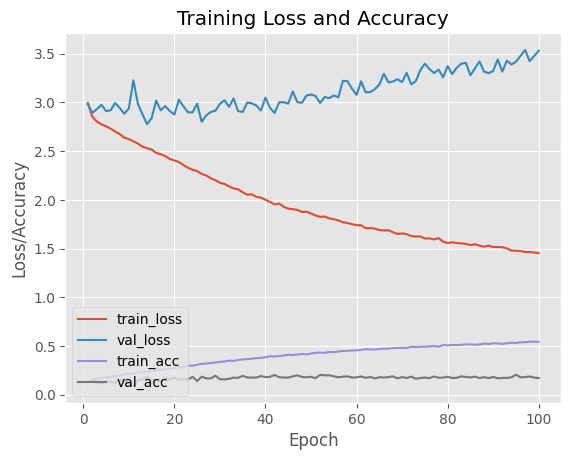

In [18]:
k = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, k+1), H.history["loss"], label="train_loss")
plt.plot(np.arange(1, k+1), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(1, k+1), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, k+1), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [45]:

 from PIL import Image
from numpy import asarray
 
# load the image and convert into
# numpy array
img = Image.open('C:/Users/Shantanu Bhavsar/Downloads/TEST23_SD/acne$rhinophyma-4.jpg')
imResize = img.resize((224,224), Image.ANTIALIAS)
test = asarray(imResize)
 
# data

new = np.reshape(test, (1,224,224,3))
print(new.shape)

(1, 224, 224, 3)


C:\Users\Shantanu Bhavsar\AppData\Local\Temp\ipykernel_4908\2208057885.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imResize = img.resize((224,224), Image.ANTIALIAS)


In [46]:
pred = model.predict(new)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.14956583 0.01104644 0.00174855 0.02311489 0.01763882 0.00123079
  0.00305731 0.00068123 0.02267162 0.20100231 0.20462178 0.00875679
  0.00042274 0.00739441 0.01567839 0.02341092 0.03409448 0.00392283
  0.06833361 0.00045442 0.15207215 0.04676081 0.00231884]]


In [51]:
from PIL import Image
from numpy import asarray
 
# load the image and convert into
# numpy array
img = Image.open('C:/Users/Shantanu Bhavsar/Downloads/TEST23_SD/atopic_dermatitis$05atopic0313062.jpg')
imResize = img.resize((224,224), Image.ANTIALIAS)
test = asarray(imResize)
 
# data

new = np.reshape(test, (1,224,224,3))
print(new.shape)

(1, 224, 224, 3)


C:\Users\Shantanu Bhavsar\AppData\Local\Temp\ipykernel_4908\1297778929.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imResize = img.resize((224,224), Image.ANTIALIAS)


In [52]:
pred = model.predict(new)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[0.00032153 0.00205043 0.19635482 0.00186424 0.01433799 0.01060777
  0.04067365 0.0006221  0.00557364 0.01268484 0.03116088 0.00036816
  0.00599243 0.00092661 0.01526366 0.08657373 0.06418975 0.09514488
  0.00968616 0.00787027 0.0260377  0.08103748 0.29065725]]


In [48]:
import h5py
# model = (Sequential())
model.save('D:/New folder/SD_23.h5')

In [ ]:
import h5py
import keras
types_sc_model = keras.models.load_model("D:/New folder/SD_23.h5",compile=False)

import tensorflow as tf 
tflite_model_file = "D:/New folder/SD_23types.tflite"

converter= tf.lite.TFLiteConverter.from_keras_model(types_sc_model)
sd_sc = converter.convert()
with open(tflite_model_file, 'wb') as f:
  f.write(sd_sc)